<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [36]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [37]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-04-01 11:58:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  69.2MB/s    in 2.2s    

2025-04-01 11:58:32 (69.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [38]:
df1 = df[["Age", "SOPartFreq", "JobSat"]].copy()
df1

,Age,SOPartFreq,JobSat
0,Under 18 years old,NaN,NaN
1,35-44 years old,Multiple times per day,NaN
2,45-54 years old,Multiple times per day,NaN
3,18-24 years old,NaN,NaN
4,18-24 years old,Multiple times per day,NaN
...,...,...,...
65432,18-24 years old,NaN,NaN
65433,25-34 years old,NaN,NaN
65434,25-34 years old,NaN,NaN
65435,18-24 years old,NaN,NaN


In [39]:
##Write your code here
# Define mappings for Age and SOPartFreq
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

so_part_freq_mapping = {
    "I have never participated in Q&A on Stack Overflow": 0,
    "Less than once per month or monthly": 1,
    "A few times per month or weekly": 2,
    "A few times per week": 3,
    "Daily or almost daily": 4,
    "Multiple times per day": 5
}

# Apply mappings
df1["AgeNumeric"] = df1["Age"].map(age_mapping)
df1["SOPartFreqNumeric"] = df1["SOPartFreq"].map(so_part_freq_mapping)

# Ensure JobSat is numeric
df1["JobSat"] = pd.to_numeric(df1["JobSat"], errors="coerce")

# Drop NaNs
df_filtered1 = df1.dropna(subset=["AgeNumeric", "SOPartFreqNumeric", "JobSat"])

# Aggregate by age
df_bubble = df_filtered1.groupby("AgeNumeric").agg(
    {"SOPartFreqNumeric": "mean", "JobSat": "mean"}
).reset_index()

In [40]:
df_bubble

,AgeNumeric,SOPartFreqNumeric,JobSat
0,16.0,1.152542,7.254237
1,21.0,0.930209,6.748820
2,29.5,1.100902,6.901804
3,39.5,1.257682,7.045654
4,49.5,1.360624,7.171540
5,59.5,1.444313,7.290284
6,70.0,1.445545,7.990099


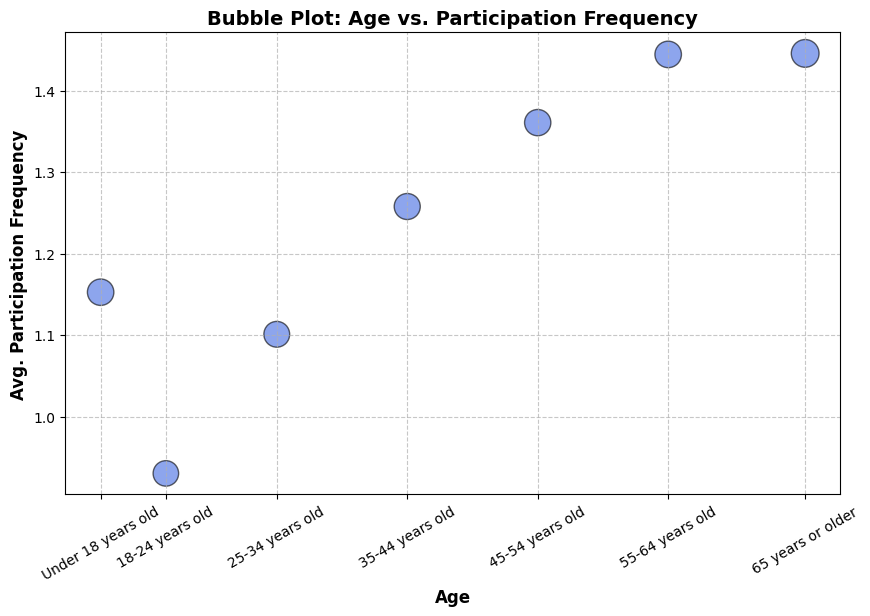

In [41]:
# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df_bubble["AgeNumeric"], df_bubble["SOPartFreqNumeric"], 
            s=df_bubble["JobSat"] * 50,  # Scale bubbles based on JobSat
            alpha=0.6, color="royalblue", edgecolors="black")

# Labels and title
plt.xlabel("Age", fontsize=12, fontweight="bold")
plt.ylabel("Avg. Participation Frequency", fontsize=12, fontweight="bold")
plt.title("Bubble Plot: Age vs. Participation Frequency", fontsize=14, fontweight="bold")

# Set x-ticks to match mapped age values
plt.xticks(df_bubble["AgeNumeric"], labels=age_mapping.keys(), rotation=30)

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [42]:
##Write your code here
# Mapping Age to Numeric Values
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

# Apply mapping to convert Age to numbers
df["AgeNumeric"] = df["Age"].map(age_mapping)

# Convert Compensation and Job Satisfaction to numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df["JobSat"] = pd.to_numeric(df["JobSat"], errors="coerce")

# Drop NaN values
df_bubble = df[["ConvertedCompYearly", "JobSat", "AgeNumeric"]].dropna()

# Scale Age for bubble sizes
df_bubble["BubbleSize"] = (df_bubble["AgeNumeric"] - df_bubble["AgeNumeric"].min()) / \
                          (df_bubble["AgeNumeric"].max() - df_bubble["AgeNumeric"].min()) * 1000

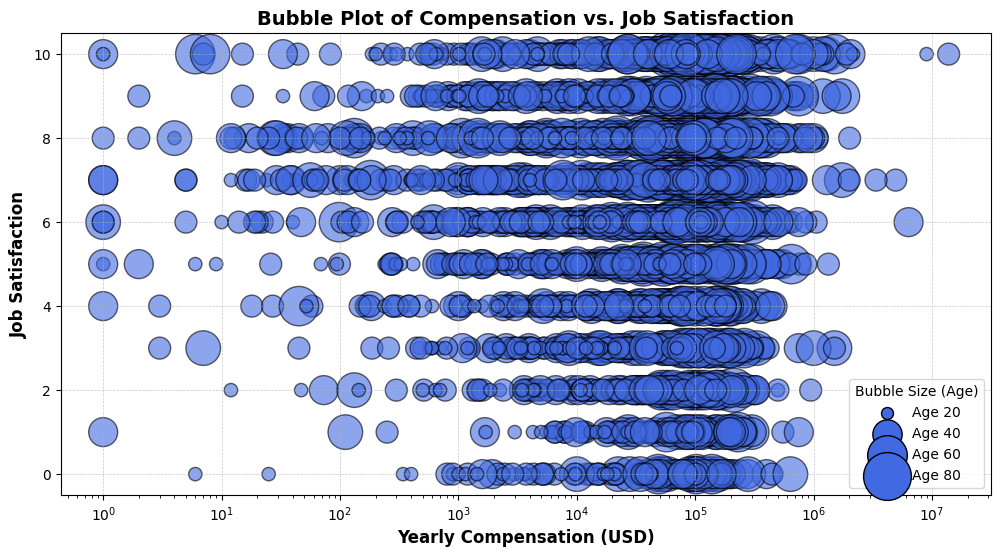

In [43]:
# Create Bubble Plot
plt.figure(figsize=(12, 6))

sc = plt.scatter(df_bubble["ConvertedCompYearly"], df_bubble["JobSat"], 
                 s=df_bubble["BubbleSize"], alpha=0.6, color="royalblue", edgecolors="black")

# Add a legend for bubble sizes
legend_sizes = [20, 40, 60, 80]  # Example age values for the legend
legend_bubbles = [(size - df_bubble["AgeNumeric"].min()) / 
                  (df_bubble["AgeNumeric"].max() - df_bubble["AgeNumeric"].min()) * 1000 for size in legend_sizes]

for size, bubble in zip(legend_sizes, legend_bubbles):
    plt.scatter([], [], s=bubble, color="royalblue", edgecolors="black", label=f"Age {size}")

plt.legend(title="Bubble Size (Age)", loc="lower right", fontsize=10)

# Labels and Title
plt.xlabel("Yearly Compensation (USD)", fontsize=12, fontweight="bold")
plt.ylabel("Job Satisfaction", fontsize=12, fontweight="bold")
plt.title("Bubble Plot of Compensation vs. Job Satisfaction", fontsize=14, fontweight="bold")

plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.xscale("log")  # Log scale to handle large salary variations
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [44]:
##Write your code here
df['LanguageHaveWorkedWith']

0                                                      NaN
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4                  C++;HTML/CSS;JavaScript;Lua;Python;Rust
                               ...                        
65432                                                  NaN
65433                                                  NaN
65434                                                  NaN
65435             C;C++;Go;Lua;Objective-C;Python;Rust;SQL
65436     C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
Name: LanguageHaveWorkedWith, Length: 65437, dtype: object

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [45]:
##Write your code here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mapping Age to Numeric Values
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

# Apply mapping to convert Age to numbers
df["AgeNumeric"] = df["Age"].map(age_mapping)

# Drop NaN values for Age and LanguageHaveWorkedWith
df_filtered = df.dropna(subset=["AgeNumeric", "LanguageHaveWorkedWith"])

# Explode the LanguageHaveWorkedWith column to count occurrences
df_exploded = df_filtered.assign(Language=df_filtered["LanguageHaveWorkedWith"].str.split(";")).explode("Language")

# Count the occurrences of each language per age group
df_lang_grouped = df_exploded.groupby(["AgeNumeric", "Language"]).size().reset_index(name="Frequency")

# Normalize Bubble Sizes (scaling between 10 and 300)
min_size, max_size = 10, 300  # Bubble size range
df_lang_grouped["BubbleSize"] = np.interp(df_lang_grouped["Frequency"], 
                                          (df_lang_grouped["Frequency"].min(), df_lang_grouped["Frequency"].max()), 
                                          (min_size, max_size))

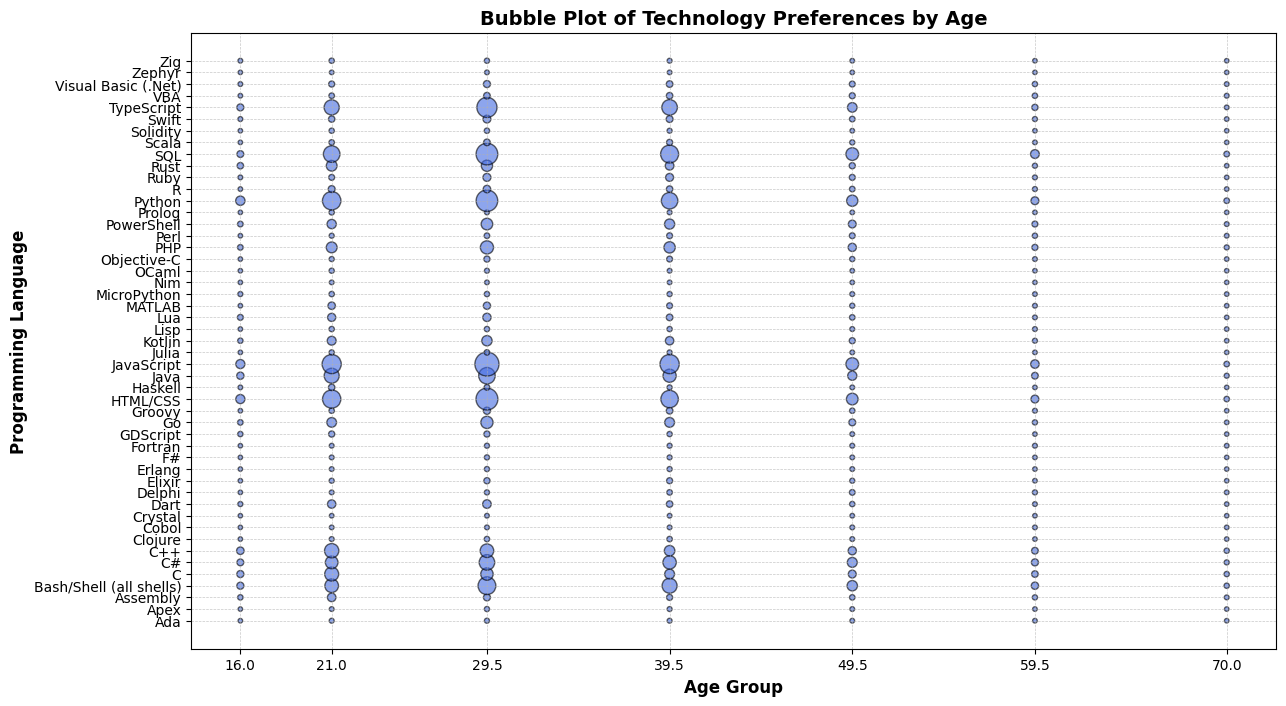

In [46]:
# Create Bubble Plot
plt.figure(figsize=(14, 8))

sc = plt.scatter(df_lang_grouped["AgeNumeric"], df_lang_grouped["Language"], 
                 s=df_lang_grouped["BubbleSize"], alpha=0.6, color="royalblue", edgecolors="black")

# Labels and Title
plt.xlabel("Age Group", fontsize=12, fontweight="bold")
plt.ylabel("Programming Language", fontsize=12, fontweight="bold")
plt.title("Bubble Plot of Technology Preferences by Age", fontsize=14, fontweight="bold")

# Customizing X-Axis Ticks
plt.xticks(sorted(df_lang_grouped["AgeNumeric"].unique()))  # Ensure ticks are in the right order

# Add Grid
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [47]:
# Drop NaNs in relevant columns
df_filtered = df.dropna(subset=["ConvertedCompYearly", "DevType", "JobSat"])

# Explode the DevType column (since one person can have multiple roles)
df_exploded = df_filtered.assign(DevType=df_filtered["DevType"].str.split(";")).explode("DevType")

# Remove extreme outliers (top 1% of compensation)
q99 = df_exploded["ConvertedCompYearly"].quantile(0.99)
df_exploded = df_exploded[df_exploded["ConvertedCompYearly"] < q99]

# Group by Developer Role, calculating median compensation & average job satisfaction
df_grouped = df_exploded.groupby("DevType").agg(
    MedianCompensation=("ConvertedCompYearly", "median"),
    AvgJobSatisfaction=("JobSat", "mean"),
    Count=("DevType", "count")  # How many respondents per role
).reset_index()

# Normalize Bubble Sizes based on Job Satisfaction (scaled between 10 and 300)
min_size, max_size = 10, 300
df_grouped["BubbleSize"] = np.interp(df_grouped["AvgJobSatisfaction"], 
                                     (df_grouped["AvgJobSatisfaction"].min(), df_grouped["AvgJobSatisfaction"].max()), 
                                     (min_size, max_size))

# Sort roles by median compensation for better visualization
df_grouped = df_grouped.sort_values(by="MedianCompensation", ascending=False)

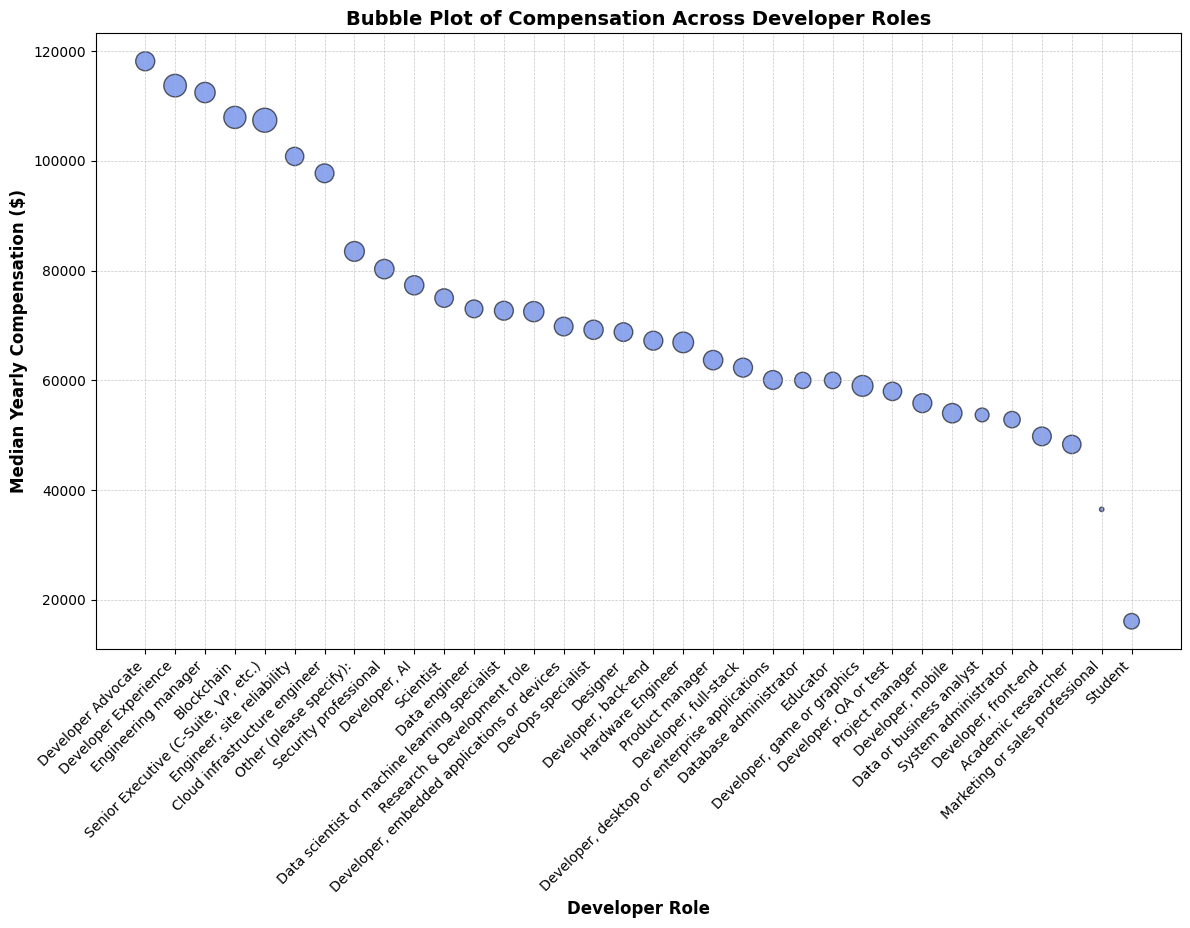

In [48]:
##Write your code here
# Create Bubble Plot
plt.figure(figsize=(14, 8))

sc = plt.scatter(df_grouped["DevType"], df_grouped["MedianCompensation"], 
                 s=df_grouped["BubbleSize"], alpha=0.6, color="royalblue", edgecolors="black")

# Labels and Title
plt.xlabel("Developer Role", fontsize=12, fontweight="bold")
plt.ylabel("Median Yearly Compensation ($)", fontsize=12, fontweight="bold")
plt.title("Bubble Plot of Compensation Across Developer Roles", fontsize=14, fontweight="bold")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Add grid
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [49]:
##Write your code here
# Sample DataFrame (Replace this with actual data)
df_collab = df[['Age', 'NEWCollabToolsHaveWorkedWith']].copy()

# Mapping Age Groups to Numeric Values
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df_collab["AgeNumeric"] = df_collab["Age"].map(age_mapping)

# Splitting collaboration tools into multiple rows
df_expanded = df_collab.assign(NEWCollabToolsHaveWorkedWith=df_collab["NEWCollabToolsHaveWorkedWith"].str.split(";")).explode("NEWCollabToolsHaveWorkedWith")

# Remove NaN values (if any)
df_expanded.dropna(subset=["NEWCollabToolsHaveWorkedWith"], inplace=True)

# Count occurrences of each collaboration tool per age group
df_grouped = df_expanded.groupby(["AgeNumeric", "NEWCollabToolsHaveWorkedWith"]).size().reset_index(name="Frequency")

# Normalize Bubble Sizes for better visualization
df_grouped["BubbleSize"] = np.interp(df_grouped["Frequency"], (df_grouped["Frequency"].min(), df_grouped["Frequency"].max()), (10, 300))


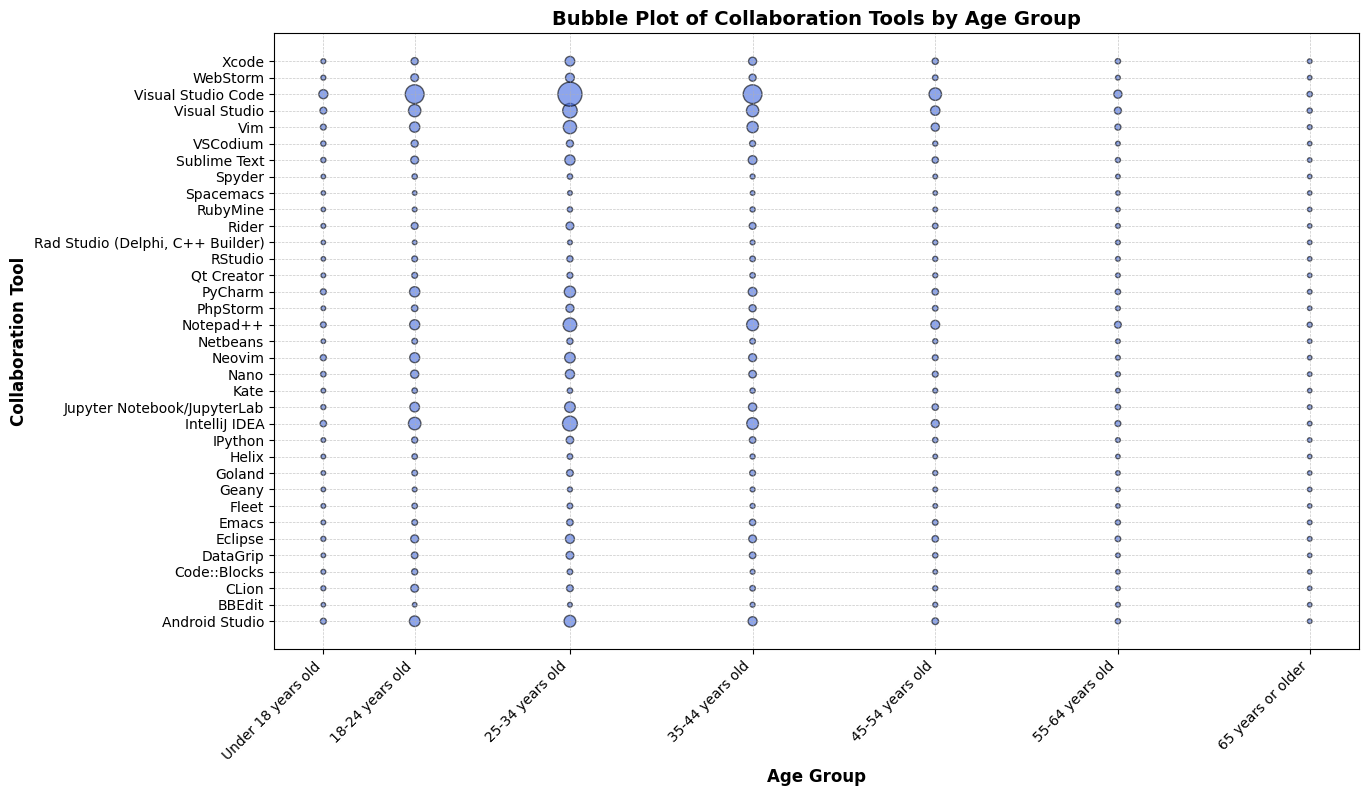

In [51]:
# Plot Bubble Chart
plt.figure(figsize=(14, 8))

sc = plt.scatter(df_grouped["AgeNumeric"], df_grouped["NEWCollabToolsHaveWorkedWith"], 
                 s=df_grouped["BubbleSize"], alpha=0.6, color="royalblue", edgecolors="black")

# Labels and Title
plt.xlabel("Age Group", fontsize=12, fontweight="bold")
plt.ylabel("Collaboration Tool", fontsize=12, fontweight="bold")
plt.title("Bubble Plot of Collaboration Tools by Age Group", fontsize=14, fontweight="bold")

# Rotate y-axis labels for readability
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45, ha="right")

# Add grid
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [52]:
##Write your code here

# Step 1: Prepare the Data
df_web = df[['WebframeWantToWorkWith', 'JobSatPoints_6']].copy()

# Drop NaN values
df_web = df_web.dropna()

# Split frameworks into multiple rows
df_web = df_web.assign(WebframeWantToWorkWith=df_web['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')

# Step 2: Aggregate data - Compute Average Job Satisfaction & Respondent Count
df_grouped = df_web.groupby('WebframeWantToWorkWith').agg(
    AvgJobSat=('JobSatPoints_6', 'mean'), 
    RespondentCount=('JobSatPoints_6', 'count')
).reset_index()

# Step 3: Normalize Bubble Sizes (for better visualization)
min_size, max_size = 50, 1000
df_grouped["BubbleSize"] = np.interp(df_grouped["RespondentCount"], 
                                     (df_grouped["RespondentCount"].min(), df_grouped["RespondentCount"].max()), 
                                     (min_size, max_size))


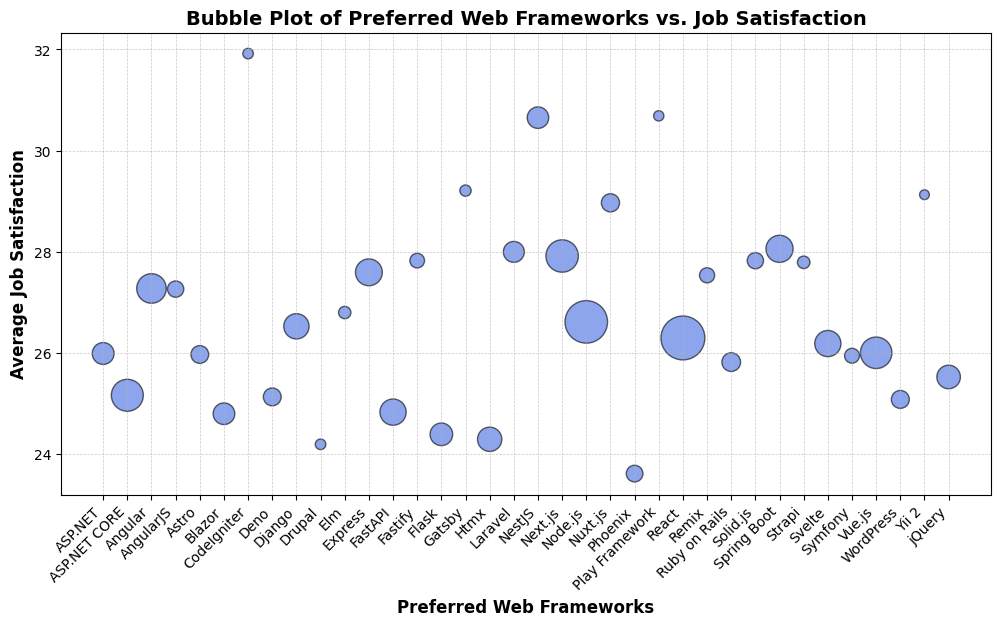

In [53]:

# Step 4: Plot Bubble Chart
plt.figure(figsize=(12, 6))
plt.scatter(df_grouped['WebframeWantToWorkWith'], df_grouped['AvgJobSat'], 
            s=df_grouped['BubbleSize'], alpha=0.6, edgecolors='black', color='royalblue')

# Step 5: Improve Aesthetics
plt.xticks(rotation=45, ha="right")
plt.xlabel("Preferred Web Frameworks", fontsize=12, fontweight="bold")
plt.ylabel("Average Job Satisfaction", fontsize=12, fontweight="bold")
plt.title("Bubble Plot of Preferred Web Frameworks vs. Job Satisfaction", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Show Plot
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here
# Step 1: Mapping countries to regions (this is a simplified example, adjust as needed)
country_to_region = {
    'United States of America': 'North America',
    'Canada': 'North America',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Italy': 'Europe',
    'Sweden': 'Europe',
    'Norway': 'Europe',
    'Spain': 'Europe',
    'Switzerland': 'Europe',
    'Poland': 'Europe',
    'Russia': 'Europe',
    'Ukraine': 'Europe',
    'Netherlands': 'Europe',
    'Ireland': 'Europe',
    'Belgium': 'Europe',
    'Austria': 'Europe',
    'Portugal': 'Europe',
    'Denmark': 'Europe',
    'Czech Republic': 'Europe',
    'Greece': 'Europe',
    'Finland': 'Europe',
    'Hungary': 'Europe',
    'Romania': 'Europe',
    'Croatia': 'Europe',
    'Bulgaria': 'Europe',
    'Serbia': 'Europe',
    'Estonia': 'Europe',
    'Latvia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Lithuania': 'Europe',
    'Kosovo': 'Europe',
    'Albania': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Monaco': 'Europe',
    'Malta': 'Europe',
    'Iceland': 'Europe',
    'North Macedonia': 'Europe',
    'Moldova': 'Europe',
    'Malta': 'Europe',
    
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Singapore': 'Asia',
    'Indonesia': 'Asia',
    'Pakistan': 'Asia',
    'Bangladesh': 'Asia',
    'Sri Lanka': 'Asia',
    'Nepal': 'Asia',
    'Vietnam': 'Asia',
    'Malaysia': 'Asia',
    'Thailand': 'Asia',
    'Philippines': 'Asia',
    'Myanmar': 'Asia',
    'Kazakhstan': 'Asia',
    'Uzbekistan': 'Asia',
    'Afghanistan': 'Asia',
    'Kuwait': 'Asia',
    'Bahrain': 'Asia',
    'Qatar': 'Asia',
    'Iraq': 'Asia',
    'Syria': 'Asia',
    'Lebanon': 'Asia',
    'Jordan': 'Asia',
    'Armenia': 'Asia',
    'Georgia': 'Asia',
    'Cyprus': 'Asia',
    'Tajikistan': 'Asia',
    'Turkmenistan': 'Asia',
    
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'Peru': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Venezuela': 'South America',
    'Paraguay': 'South America',
    'Bolivia': 'South America',
    'Uruguay': 'South America',
    'Guyana': 'South America',
    'Suriname': 'South America',

    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Kenya': 'Africa',
    'Egypt': 'Africa',
    'Morocco': 'Africa',
    'Ghana': 'Africa',
    'Uganda': 'Africa',
    'Angola': 'Africa',
    'Senegal': 'Africa',
    'Ethiopia': 'Africa',
    'Cameroon': 'Africa',
    'Congo': 'Africa',
    'Zimbabwe': 'Africa',
    'Mozambique': 'Africa',
    'Tanzania': 'Africa',
    'Zambia': 'Africa',
    'Malawi': 'Africa',
    'Botswana': 'Africa',
    'Liberia': 'Africa',
    'Sierra Leone': 'Africa',
    'Togo': 'Africa',
    'Namibia': 'Africa',
    'Mali': 'Africa',
    'Chad': 'Africa',
    'Burkina Faso': 'Africa',
    'Côte d\'Ivoire': 'Africa',
    'Gabon': 'Africa',
    'Mauritius': 'Africa',
    'Rwanda': 'Africa',
    'Lesotho': 'Africa',
    'Mauritania': 'Africa',
    'Benin': 'Africa',
    'Burundi': 'Africa',
    
    'Mexico': 'North America',
    'Costa Rica': 'Central America',
    'Panama': 'Central America',
    'Honduras': 'Central America',
    'Guatemala': 'Central America',
    'El Salvador': 'Central America',
    'Nicaragua': 'Central America',
    'Belize': 'Central America',
    
    'Cuba': 'Caribbean',
    'Jamaica': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Haiti': 'Caribbean',
    'Trinidad and Tobago': 'Caribbean',
    'Barbados': 'Caribbean',
    'Saint Lucia': 'Caribbean',
    'Saint Kitts and Nevis': 'Caribbean',
    'The Bahamas': 'Caribbean',
    
    'Saudi Arabia': 'Middle East',
    'Israel': 'Middle East',
    'Iran': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Jordan': 'Middle East',
    'Lebanon': 'Middle East',
    'Oman': 'Middle East',
    'Kuwait': 'Middle East',
    'Qatar': 'Middle East',
    'Yemen': 'Middle East',
    'Bahrain': 'Middle East',
    'Iraq': 'Middle East',
    'Syria': 'Middle East',
    'Palestine': 'Middle East',
}

# Step 2: Group the data by Country and LanguageAdmired to calculate admiration frequency
df_admired = df.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='AdmirationCount')

# Step 3: Map countries to regions (if desired)
df_admired['Region'] = df_admired['Country'].map(country_to_region)

# Step 4: Normalize the bubble sizes (scaled between 10 and 300)
min_size, max_size = 10, 300
df_admired["BubbleSize"] = np.interp(df_admired["AdmirationCount"], 
                                     (df_admired["AdmirationCount"].min(), df_admired["AdmirationCount"].max()), 
                                     (min_size, max_size))

/tmp/ipykernel_300/4213804815.py:199: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


In [ ]:
 #Step 5: Create the Bubble Plot
plt.figure(figsize=(12, 8))

# Scatter plot with bubble sizes representing admiration frequency
scatter = plt.scatter(
    df_admired['Country'], df_admired['LanguageAdmired'], 
    s=df_admired['BubbleSize'], alpha=0.7, c=df_admired['AdmirationCount'], cmap='viridis', edgecolors='black'
)

# Add title and labels
plt.title("Admired Technologies Across Countries", fontsize=14, fontweight="bold")
plt.xlabel("Country", fontsize=12, fontweight="bold")
plt.ylabel("Admired Technology", fontsize=12, fontweight="bold")

# Rotate x-axis labels for readability
plt.xticks(rotation=90, ha="right")

# Add a color bar to show the admiration count scale
plt.colorbar(scatter, label='Admiration Count')

# Add grid for better readability
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
